# **Dashboard**

## Objectives

* To prepare data for dashboard development, including conducting further data manipulation
* To develop a dashboard that provides insights on the analysis results

## Inputs

* Cleaned Mpox dataset from the notebook 1 

## Outputs

* Cleaned dataset for dashboard development
* Power BI Dashboard saved in github


---

# Change working directory

Changing the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\zzama\\OneDrive\\Documents\\Data Analytics with AI Course\\Capstone Project\\Risk-Factors-for-MonkeyPox-Infection\\jupyter_notebooks'

Making the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\zzama\\OneDrive\\Documents\\Data Analytics with AI Course\\Capstone Project\\Risk-Factors-for-MonkeyPox-Infection'

# Section 1: Load dataset and Inspect the data

Import core libraries and load data

In [4]:
# Import core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

Load dataset

In [6]:
# Load dataset
df = pd.read_csv("Dataset/Mpox_Cleaned.csv")

# Print shape of the dataset
print("Dataset shape:", df.shape)

df.head() # Display the first few rows of the dataset

Dataset shape: (25000, 10)


,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,No,False,True,True,True,False,True,False,False,Negative
1,Fever,True,False,True,True,False,False,True,False,Positive
2,Fever,False,True,True,False,False,False,True,False,Positive
3,No,True,False,False,False,True,True,True,False,Positive
4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive


Did a quick inspection of the data to ensure everything is as expected. This included:
* Checked column names, missing data, data type, unique values, and duplicates
* No issue found, so no further cleaning was done.
* However, some data manipulation were needed to prepare the data for dashboard

In [7]:
# Check column data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Systemic Illness                25000 non-null  object
 1   Rectal Pain                     25000 non-null  bool  
 2   Sore Throat                     25000 non-null  bool  
 3   Penile Oedema                   25000 non-null  bool  
 4   Oral Lesions                    25000 non-null  bool  
 5   Solitary Lesion                 25000 non-null  bool  
 6   Swollen Tonsils                 25000 non-null  bool  
 7   HIV Infection                   25000 non-null  bool  
 8   Sexually Transmitted Infection  25000 non-null  bool  
 9   MonkeyPox                       25000 non-null  object
dtypes: bool(8), object(2)
memory usage: 586.1+ KB


In [8]:
# Describe the dataset to get summary statistics

df.describe().T # Transpose for better readability

,count,unique,top,freq
Systemic Illness,25000,4,Fever,6382
Rectal Pain,25000,2,False,12655
Sore Throat,25000,2,True,12554
Penile Oedema,25000,2,True,12612
Oral Lesions,25000,2,False,12514
Solitary Lesion,25000,2,True,12527
Swollen Tonsils,25000,2,True,12533
HIV Infection,25000,2,True,12584
Sexually Transmitted Infection,25000,2,False,12554
MonkeyPox,25000,2,Positive,15909


In [11]:
# Print unique values for all columns
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}\n")

Unique values in column 'Systemic Illness': ['No' 'Fever' 'Swollen Lymph Nodes' 'Muscle Aches and Pain']

Unique values in column 'Rectal Pain': [False  True]

Unique values in column 'Sore Throat': [ True False]

Unique values in column 'Penile Oedema': [ True False]

Unique values in column 'Oral Lesions': [ True False]

Unique values in column 'Solitary Lesion': [False  True]

Unique values in column 'Swollen Tonsils': [ True False]

Unique values in column 'HIV Infection': [False  True]

Unique values in column 'Sexually Transmitted Infection': [False  True]

Unique values in column 'MonkeyPox': ['Negative' 'Positive']



In [13]:
# Check for duplicates
df.duplicated().sum()

22957

# Section 2: Data Cleaning

Data manipulation

* To improve visualisation, some feature engineering were done, including encoding some labels
* To improve dashboard filtering functions, data was split into fact and dimension tables. This simplifies complex queries, improves performance by reducing joins, and makes data analysis for reporting and dashboards faster and more intuitive.

In [9]:
# Split systemic illness into 0 and 1 columns for fever, swollen lymph nodes, muscle aches
df['Fever'] = np.where(df['Systemic Illness'] == 'Fever', 1, 0)
df['Swollen Nodes'] = np.where(df['Systemic Illness'] == 'Swollen Lymph Nodes', 1, 0)
df['Muscle Aches'] = np.where(df['Systemic Illness'] == 'Muscle Aches and Pain', 1, 0)

df = df.replace([1, 0], ['Yes','No']) # Encode 1 and 0 back to Yes and No for better readability

df.head()

,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox,Fever,Swollen Nodes,Muscle Aches
0,No,False,True,True,True,False,True,False,False,Negative,No,No,No
1,Fever,True,False,True,True,False,False,True,False,Positive,Yes,No,No
2,Fever,False,True,True,False,False,False,True,False,Positive,Yes,No,No
3,No,True,False,False,False,True,True,True,False,Positive,No,No,No
4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive,No,Yes,No


---

Generate unique identifier and set it as index

In [10]:
# Generate unique identifiers and make it the primary key
df.insert(0, 'Case_ID', range(1, 1 + len(df)))
df.set_index('Case_ID', inplace=True)
df.head()

,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox,Fever,Swollen Nodes,Muscle Aches
Case_ID,,,,,,,,,,,,,
1,No,False,True,True,True,False,True,False,False,Negative,No,No,No
2,Fever,True,False,True,True,False,False,True,False,Positive,Yes,No,No
3,Fever,False,True,True,False,False,False,True,False,Positive,Yes,No,No
4,No,True,False,False,False,True,True,True,False,Positive,No,No,No
5,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive,No,Yes,No


Save the cleaned data for dashboard

In [11]:
# Save cleaned data to a new CSV file
df.to_csv("Dataset/Mpox_Dashboard.csv", index=False)

Create fact and dimension tables for dashboard

In [12]:
# Create fact and dimension tables for dashboarding
fact_table = df[['MonkeyPox']]
dim_indicators = df[['Swollen Nodes', 'Muscle Aches', 'Rectal Pain', 'Systemic Illness', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils', 'Swollen Nodes', 'Muscle Aches', 'Fever']]
dim_infections = df[['Sexually Transmitted Infection', 'HIV Infection']]

print (fact_table.head())
print (dim_indicators.head())
print (dim_infections.head())

# Save the tables to CSV files
fact_table.to_csv("Power_BI_Dashboard/Fact_MPox.csv", index=True)
dim_indicators.to_csv("Power_BI_Dashboard/Dim_Indicators.csv", index=True)
dim_infections.to_csv("Power_BI_Dashboard/Dim_Infections.csv", index=True)


        MonkeyPox
Case_ID          
1        Negative
2        Positive
3        Positive
4        Positive
5        Positive
        Swollen Nodes Muscle Aches  Rectal Pain     Systemic Illness  \
Case_ID                                                                
1                  No           No        False                   No   
2                  No           No         True                Fever   
3                  No           No        False                Fever   
4                  No           No         True                   No   
5                 Yes           No         True  Swollen Lymph Nodes   

         Sore Throat  Penile Oedema  Oral Lesions  Solitary Lesion  \
Case_ID                                                              
1               True           True          True            False   
2              False           True          True            False   
3               True           True         False            False   
4              Fals

NOTE

# Section 3: Dashboard development

The cleaned data was loaded into Power BI for further analyses and the following was done as part of the development
*  Load fact and dimension tables in Power BI
*  The focus of the dashboard is to describe the characteristics of the Mpox cases during the 2022 outbreak
*  Informed by the ML model, I mainly focused on the relevant features.

Given the dataset only had binary categorical variables, the dashbaord has the following visualizations: 

1. Pie Chart
* To show proportions or percentages of a whole in a simple, visual way. It’s one of the most intuitive charts because people can quickly see how each slice compares to the entire circle.
* It was used to emphasize how Mpox test results were divided up during the outbreak

2. Stacked column charts
* Are a powerful way to show how parts contribute to a whole across multiple categories while also allowing comparison between groups. They’re essentially vertical bar charts where each bar is divided into segments (the “stack”), representing subcategories.
* It was used to visualize categorical distributions of Mpox infection across people who had swollen nodes or not.

3. 100% stacked bar chart
* This is a type of bar chart where each bar represents 100% of a category, and the segments within the bar show the relative proportion of subcategories. Unlike a regular stacked bar chart (which shows absolute values), the 100% version normalizes all bars to the same length, making it easier to compare proportions across categories.
* It was used mainly to show Mpox distribution shifts across groups (sore throat or no sore throat) without letting absolute sample sizes dominate the story.

4. Clustered column and bar charts
* They are designed to make direct comparisons between subcategories across multiple groups. Instead of stacking values in one bar, the chart places them side by side (clustered) within each category.
* I used these charts to compare subcategories (Fever or no fever and rectal pain or no rectal pain) directly across Mpox test results

5. Card
* A Card in Power BI is designed to display a single key metric or value in a clean, prominent way. It is like a digital “dashboard speedometer” that highlights the most important number you want your audience to notice.
* I used this to display the total number of people that were tested for Mpox infection. As you go through the charts, this number changes and display absolute number of people for the chart in focus.

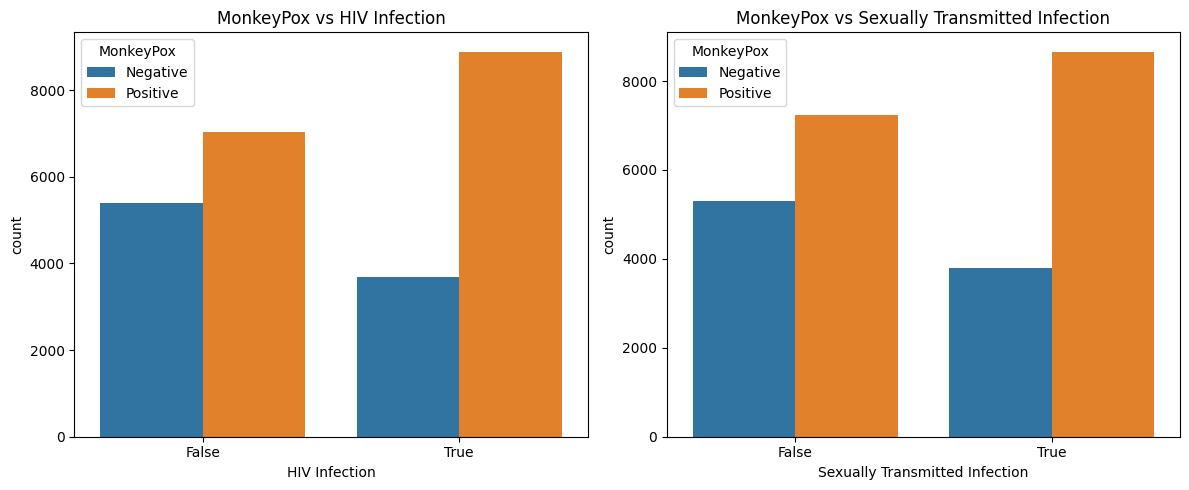

In [13]:
# Subplots MonkeyPox vs HIV Infection and Sexually Transmitted Infection
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='HIV Infection', hue='MonkeyPox', data=df, ax=axes[0])
axes[0].set_title('MonkeyPox vs HIV Infection')
sns.countplot(x='Sexually Transmitted Infection', hue='MonkeyPox', data=df, ax=axes[1])
axes[1].set_title('MonkeyPox vs Sexually Transmitted Infection')
plt.tight_layout()
plt.show()

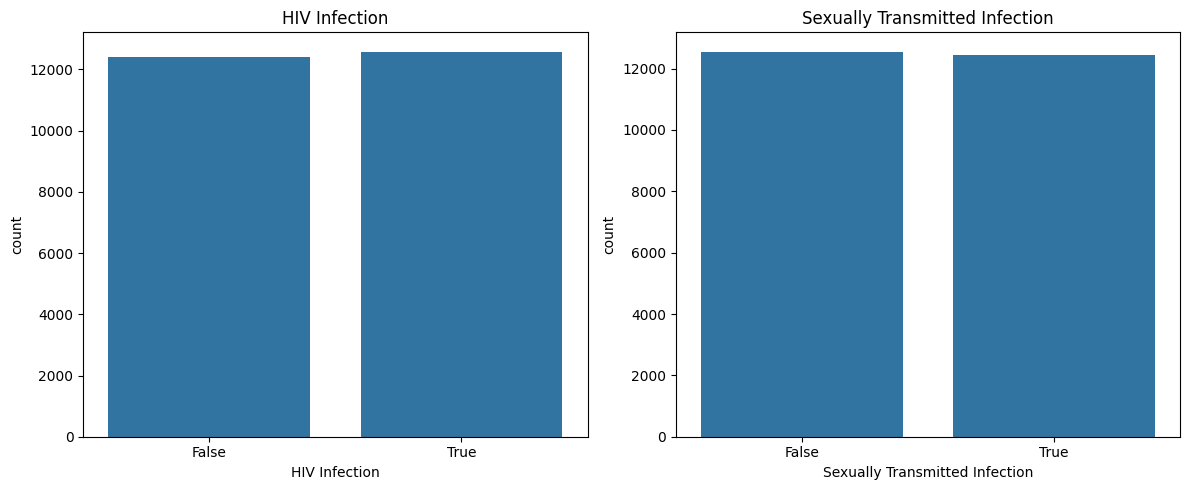

In [12]:
# Plot HIV Infection and Sexually Transmitted Infection on same plot side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='HIV Infection', data=df, ax=axes[0])
axes[0].set_title('HIV Infection')
sns.countplot(x='Sexually Transmitted Infection', data=df, ax=axes[1])
axes[1].set_title('Sexually Transmitted Infection')
plt.tight_layout()  
plt.show()

In [14]:
# vaLUE COUNTS FOR HIV INFECTION AND SEXUALLY TRANSMITTED INFECTION
print("Value counts for HIV Infection:")
print(df['HIV Infection'].value_counts())
print("\nValue counts for Sexually Transmitted Infection:")
print(df['Sexually Transmitted Infection'].value_counts())


Value counts for HIV Infection:
HIV Infection
True     12584
False    12416
Name: count, dtype: int64

Value counts for Sexually Transmitted Infection:
Sexually Transmitted Infection
False    12554
True     12446
Name: count, dtype: int64


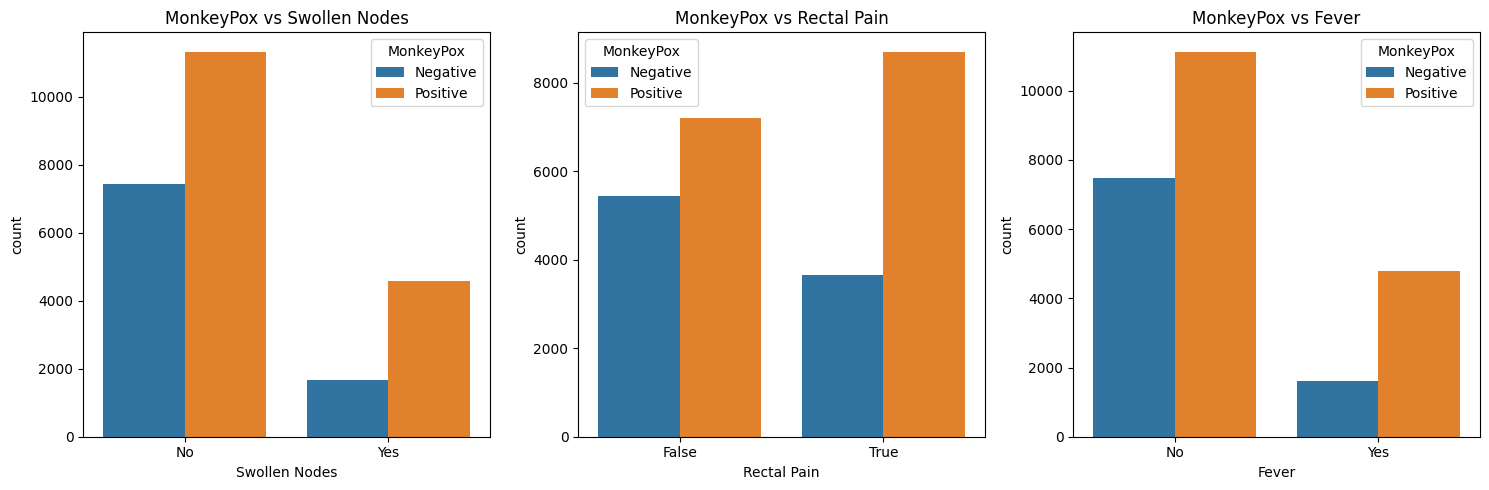

In [11]:
# Subplots for MonkeyPox vs Swollen Nodes, Rectal Pain and Fever 
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(x='Swollen Nodes', hue='MonkeyPox', data=df, ax=axes[0])
axes[0].set_title('MonkeyPox vs Swollen Nodes')
sns.countplot(x='Rectal Pain', hue='MonkeyPox', data=df, ax=axes[1])
axes[1].set_title('MonkeyPox vs Rectal Pain')
sns.countplot(x='Fever', hue='MonkeyPox', data=df, ax=axes[2])
axes[2].set_title('MonkeyPox vs Fever')
plt.tight_layout()
plt.show()

---

# Conclusion and next steps

* I have performed data inspection and data cleaning
* A few issues were identified during inspection and were addressed during data cleaning, including missing values
* Cleaned data has been saved and pushed to github
* Next step is data exploration